### About the Datasets ###

The [datasets](https://www.kaggle.com/mlg-ulb/creditcardfraud) contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Project Overview ###

1. There are 2 classes: normal transaction or fraud transaction. Thus, the fraud detection problem is a binary classification problem. We will use **Logistic Regression** as our model.
2. We will drop out some features and standardize the features, V1..V28, time, and amount.
3. We will use cross-validation to evaluate our model.

### Import Packages ###

In [32]:
# Imports

# Numpy,Pandas
import numpy as np
import pandas as pd
import datetime

# matplotlib,seaborn,pyecharts

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import missingno as msno

# import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# ignore warnings
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.float_format', lambda x: '%.4f' % x)

from imblearn.over_sampling import SMOTE
import itertools

### Get and Analyze Data ###

In [4]:
data_cr = pd.read_csv('creditcard.csv' , encoding='latin-1')
data_cr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# check size of the dataset
data_cr.shape

(284807, 31)

In [6]:
# check the basic info of the dataset
data_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
# check the stats of each column
data_cr.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


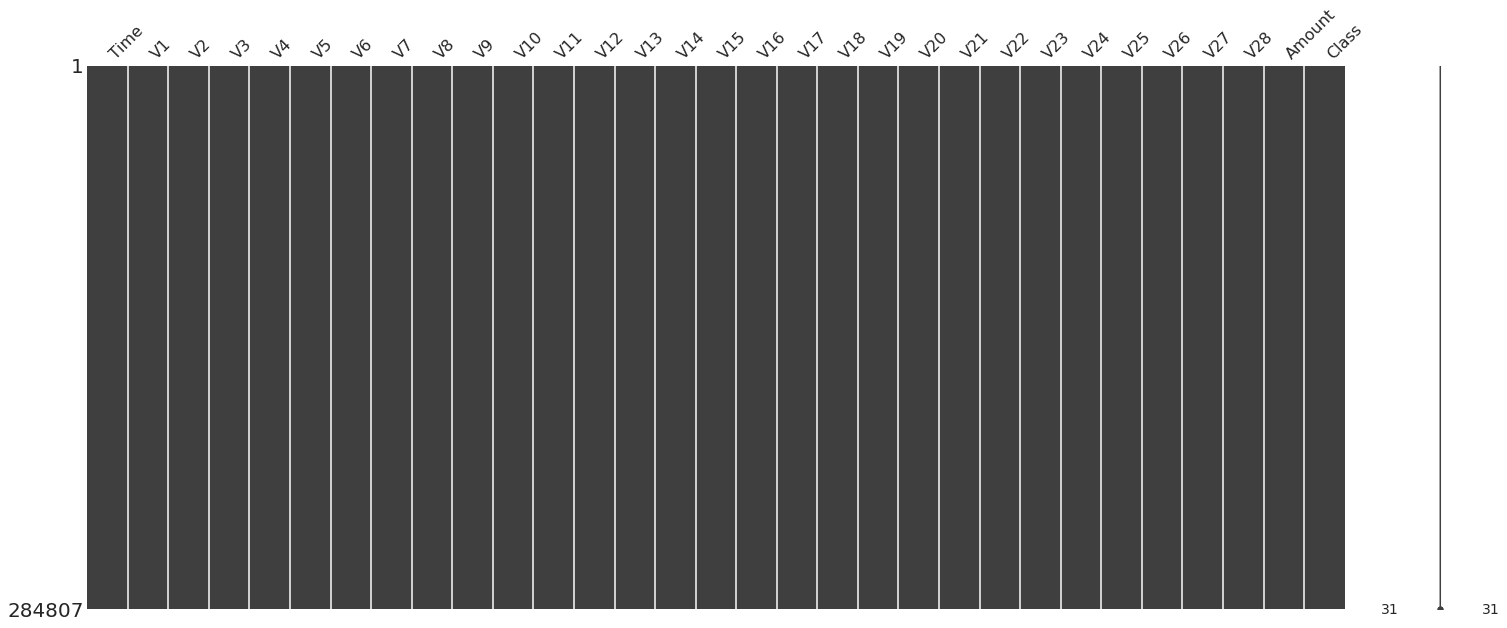

In [12]:
# check if there are some missing values
msno.matrix(data_cr)

From the picture, there is no missing value.

## Feature Engineering ##

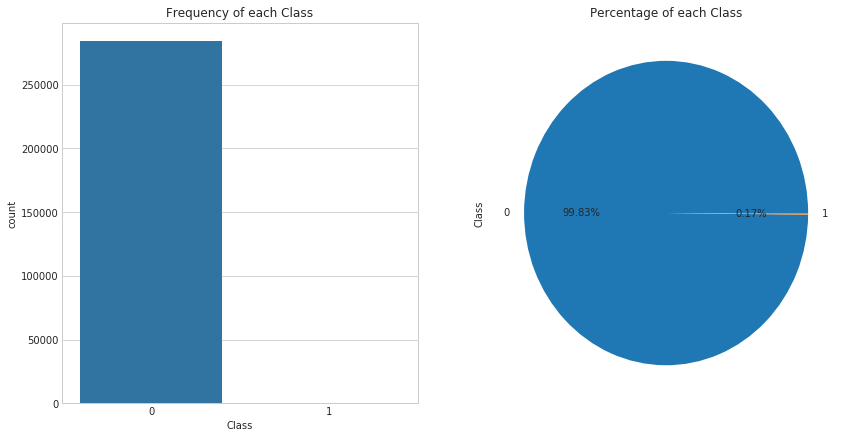

In [13]:
# visualize two classes
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='Class',data=data_cr,ax=axs[0])
axs[0].set_title("Frequency of each Class")
data_cr['Class'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Class")
plt.show()

There are 284,807 transactions in total, but only 492 of them are fraud transactions. The imbalance of two classes will influence the trainning of the classifier. We will handle this issue later on.

In [15]:
# list out the amount of two classes
data_cr.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

### Feature Extension ###

In [16]:
# change time from daily-based to hourly-based
data_cr['Hour'] =data_cr["Time"].apply(lambda x : divmod(x, 3600)[0])

### Exploratory Data Analysis ###

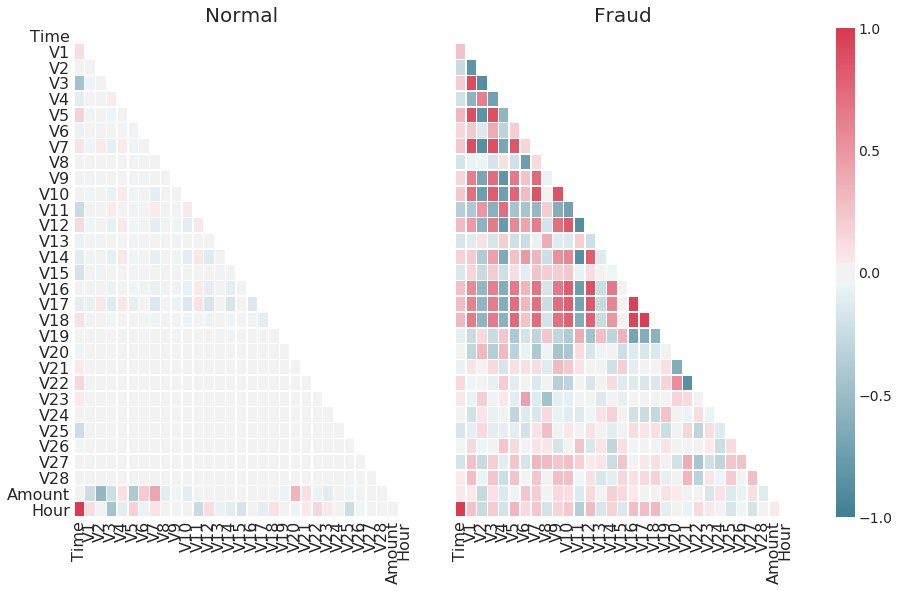

In [17]:
# check the difference between normal transactions and fraud transactions
Xfraud = data_cr.loc[data_cr["Class"] == 1] # update Xfraud & XnonFraud with cleaned data
XnonFraud = data_cr.loc[data_cr["Class"] == 0]

correlationNonFraud = XnonFraud.loc[:, data_cr.columns != 'Class'].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Normal', size = 20)

correlationFraud = Xfraud.loc[:, data_cr.columns != 'Class'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraud', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

From the above picture, we know that the flagged fraud transactions are highly related to some variables. Varaibles V1、V2、V3、V4、V5、V6、V7、V9、V10、V11、V12、V14、V16、V17, V18 and V19 have some relation to the fraud transactions.

#### Relation between fraud transactions, transacations amount, and transaction time ####

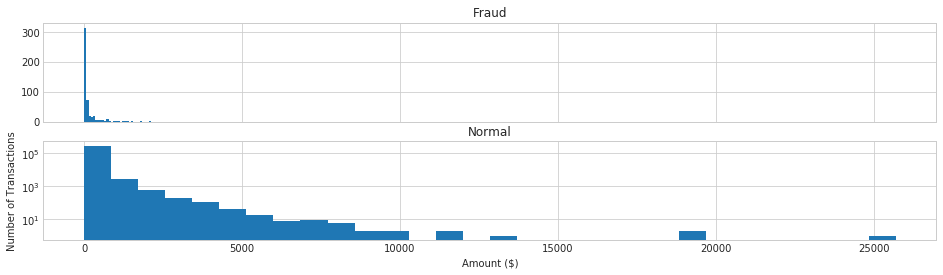

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))

bins = 30

ax1.hist(data_cr["Amount"][data_cr["Class"]== 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data_cr["Amount"][data_cr["Class"] == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

People who conducted fraud transactions prefer small amount of transactions.

#### what time interval do people make transacations? ####

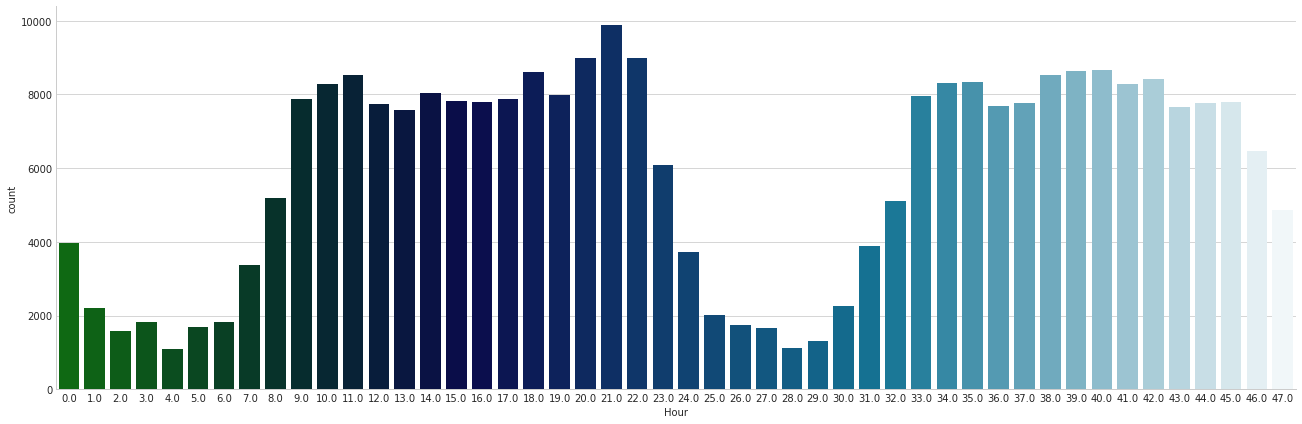

In [19]:
sns.factorplot(x="Hour", data=data_cr, kind="count",  palette="ocean", size=6, aspect=3)

People usually make transactions from 9:00AM to 11:00PM.

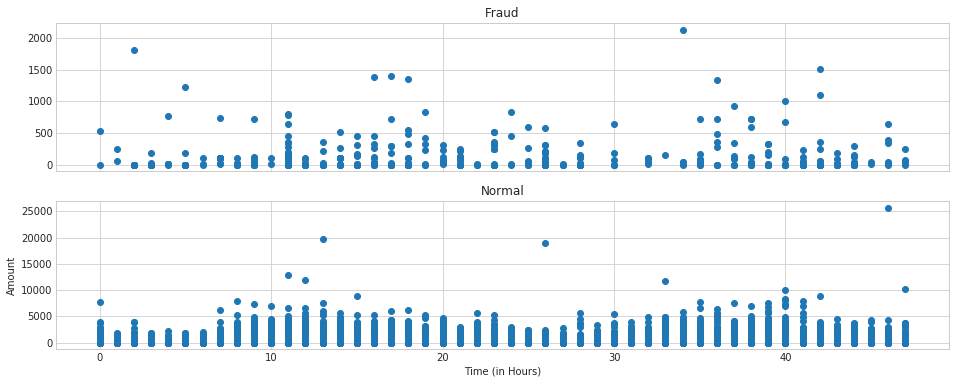

In [20]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))

ax1.scatter(data_cr["Hour"][data_cr["Class"] == 1], data_cr["Amount"][data_cr["Class"]  == 1])
ax1.set_title('Fraud')

ax2.scatter(data_cr["Hour"][data_cr["Class"] == 0], data_cr["Amount"][data_cr["Class"] == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Hours)')
plt.ylabel('Amount')
plt.show()

In [21]:
print ("Fraud Stats Summary")
print (data_cr["Amount"][data_cr["Class"] == 1].describe())
print ()
print ("Normal Stats Summary")
print (data_cr["Amount"][data_cr["Class"]  == 0].describe())

Fraud Stats Summary
count    492.0000
mean     122.2113
std      256.6833
min        0.0000
25%        1.0000
50%        9.2500
75%      105.8900
max     2125.8700
Name: Amount, dtype: float64

Normal Stats Summary
count   284315.0000
mean        88.2910
std        250.1051
min          0.0000
25%          5.6500
50%         22.0000
75%         77.0500
max      25691.1600
Name: Amount, dtype: float64


Most fraud transactions happen from 11:00PM to 9:00PM.

#### Drop some features ####

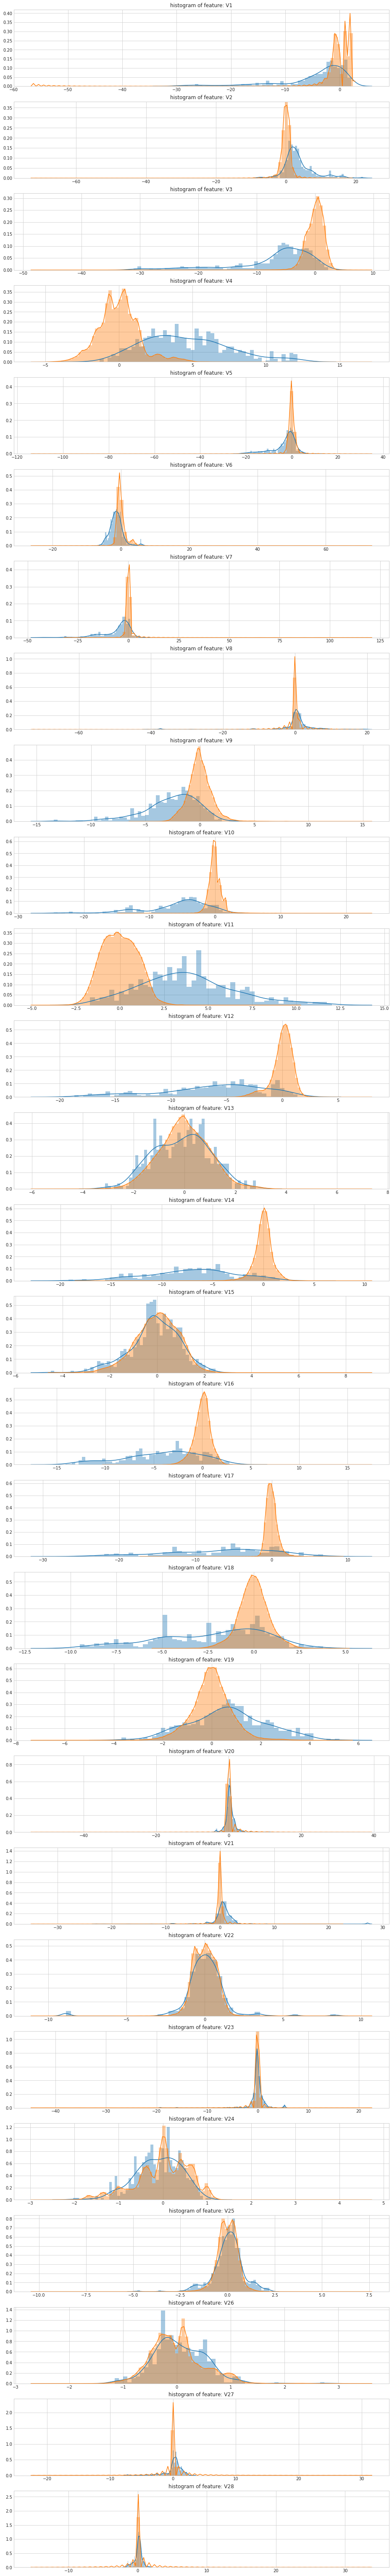

In [22]:
#Select only the anonymized features.
v_feat = data_cr.ix[:,1:29].columns
plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data_cr[v_feat]):
    ax = plt.subplot(gs[i])
    sns.distplot(data_cr[cn][data_cr["Class"] == 1], bins=50)
    sns.distplot(data_cr[cn][data_cr["Class"] == 0], bins=100)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))

The above graphs show the distribution of normal transactions and fraud transactions for different variables. We will keep those variables that have clear distinction between normal transactions and fraud transactions. Thus, we will drop V8、V13 、V15 、V20 、V21 、V22、 V23 、V24 、V25 、V26 、V27 and V28.

In [24]:
droplist = ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Time']
data_new = data_cr.drop(droplist, axis = 1)
data_new.shape

(284807, 19)

We reduced features from 31 to 18.

### Standardization and Normalization ###

In [25]:
# standarsize amount and hour
col = ['Amount','Hour']
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
data_new[col] =sc.fit_transform(data_new[col])
data_new.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.3638,0.0908,-0.5516,-0.6178,-0.3112,-0.4704,0.2080,0.0258,0.4040,0.2450,0,-1.9603
1,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,-0.2554,-0.1670,1.6127,1.0652,-0.1438,0.4639,-0.1148,-0.1834,-0.1458,-0.3425,0,-1.9603
2,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,-1.5147,0.2076,0.6245,0.0661,-0.1659,-2.8901,1.1100,-0.1214,-2.2619,1.1607,0,-1.9603
3,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,-1.3870,-0.0550,-0.2265,0.1782,-0.2879,-1.0596,-0.6841,1.9658,-1.2326,0.1405,0,-1.9603
4,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,0.8177,0.7531,-0.8228,0.5382,-1.1197,-0.4514,-0.2370,-0.0382,0.8035,-0.0734,0,-1.9603


### Order Features by Its Importance ###

In [27]:
# construct X and Y
x_feature = list(data_new.columns)
x_feature.remove('Class')
x_val = data_new[x_feature]
y_val = data_new['Class']

#### Sort features using feature importance of Random Forest ####

In [28]:
names = data_cr[x_feature].columns
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123)
clf.fit(x_val, y_val)
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)

('V1', 0.016428960714380998)
('V2', 0.012088954341890348)
('V3', 0.019333047192017873)
('V4', 0.0419543803589887)
('V5', 0.01812418059009202)
('V6', 0.02126325840563289)
('V7', 0.02330647145553924)
('V9', 0.022616308229698158)
('V10', 0.08104934217396946)
('V11', 0.06706027490232476)
('V12', 0.1319622660254698)
('V14', 0.12929955280214372)
('V16', 0.14082738583269536)
('V17', 0.211273164259213)
('V18', 0.01952899409481077)
('V19', 0.02003014913528499)
('Amount', 0.011748452413655337)
('Hour', 0.012104857072192587)


(-1, 18)

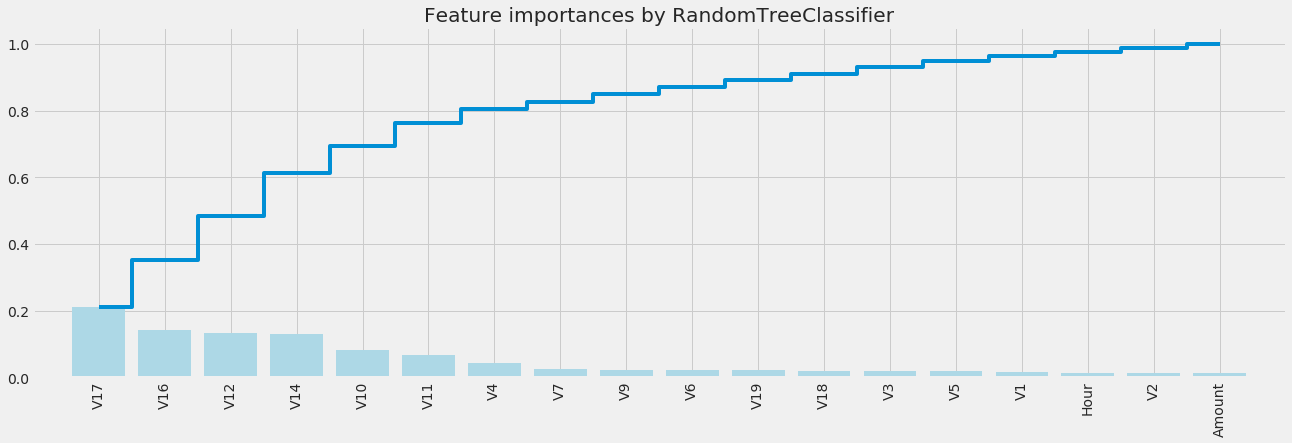

In [29]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## visualize feature importances
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])

### Train Model ###

#### Handle imbalanced datasets ####

In [30]:
# construct X and y
X = data_cr[x_feature]
y = data_cr["Class"]

n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('sample #：{}; positive samples{:.2%}; negative samples{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('dimension：', X.shape[1])

sample #：284807; positive samples99.83%; negative samples0.17%
dimension： 18


In [36]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)    # handle oversampling
X, y = sm.fit_sample(X, y)
print('after balancing positive and negative ')
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('sample #：{}; positive samples{:.2%}; negative samples{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))

after balancing positive and negative 
sample #：568630; positive samples50.00%; negative samples50.00%


### Build Logistic Regression Model ###

In [37]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf1.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### In-Sample Prediction ###

In [38]:
predicted1 = clf.predict(X)
print("Test set accuracy score: {:.5f}".format(accuracy_score(predicted1, y,)))

Test set accuracy score: 0.90153


Recall metric in the testing dataset:  0.8031690202768057


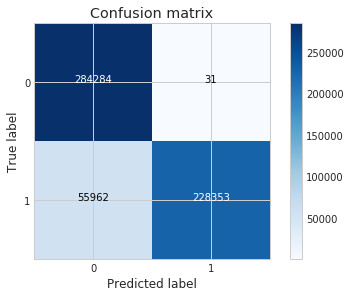

In [49]:
def plot_confusion_matrix(cm, classes,
                      title='Confusion matrix',
                      cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ##################################################################################

# Compute confusion matrix
cnf_matrix = confusion_matrix(y, predicted1)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

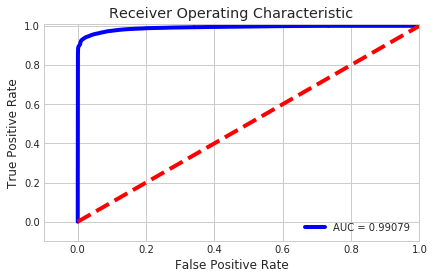

In [41]:
y_pred1_prob = clf1.predict_proba(X)[:, 1]  # 0.5 by default
fpr, tpr, thresholds = roc_curve(y,y_pred1_prob)
roc_auc = auc(fpr,tpr)

# draw ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.5f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Model Evaluation and Optimization ###

#### We will use cross-validation to evaluatve our model and use grid search to optimize the model. ####

In [42]:
# random_state = 0 -> the splitted data will be the same every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# construct a set of parameters
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000,],
                            'penalty': [ 'l1', 'l2']}

grid_search = GridSearchCV(LogisticRegression(),  param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
results = pd.DataFrame(grid_search.cv_results_) 
best = np.argmax(results.mean_test_score.values)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'penalty': 'l1'}
Best cross-validation score: 0.95818


In [44]:
y_pred = grid_search.predict(X_test)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred,)))

Test set accuracy score: 0.95857


In [45]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96     85172
          1       0.98      0.93      0.96     85417

avg / total       0.96      0.96      0.96    170589



In [46]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'penalty': 'l1'}
Best cross-validation score: 0.95818


Recall metric in the testing dataset:  0.93239050774436


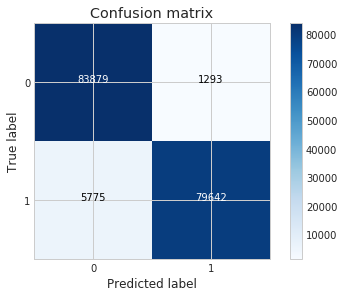

In [50]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

#### Model Evaluation ####

In this problem, we want to focus more on recall rate instead of precision.

Recall metric in the testing dataset:  0.9825561656344756


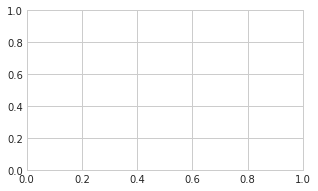

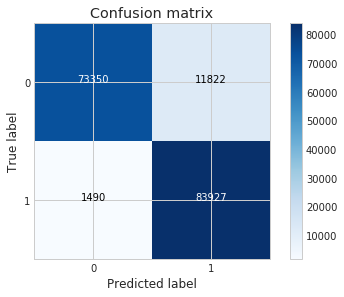

Recall metric in the testing dataset:  0.9674889073603615


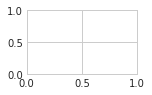

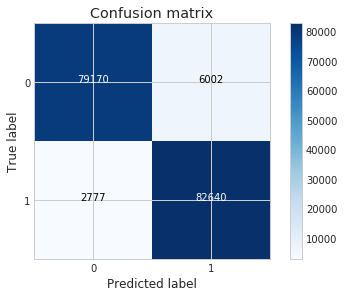

Recall metric in the testing dataset:  0.9527026235995176


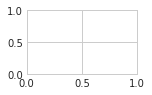

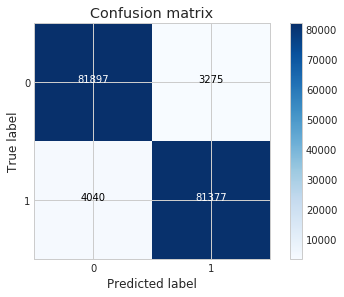

Recall metric in the testing dataset:  0.941873397567229


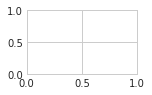

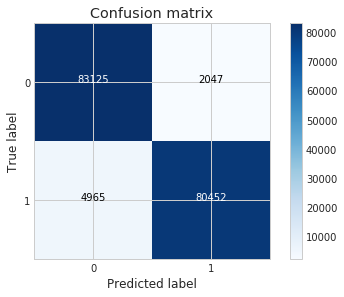

Recall metric in the testing dataset:  0.93239050774436


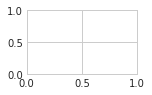

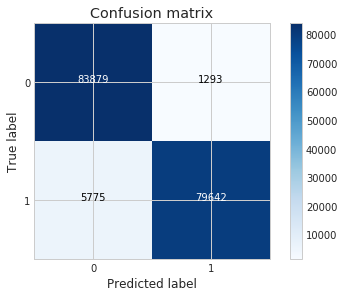

Recall metric in the testing dataset:  0.9261856539096432


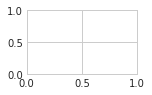

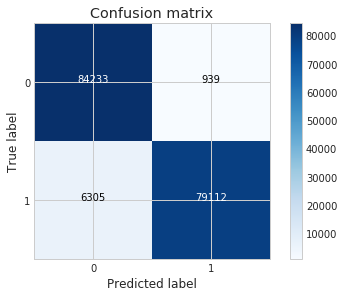

Recall metric in the testing dataset:  0.9196998255616563


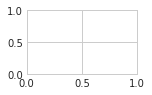

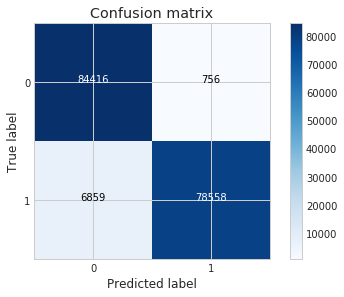

Recall metric in the testing dataset:  0.9118091246473184


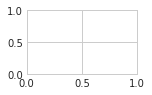

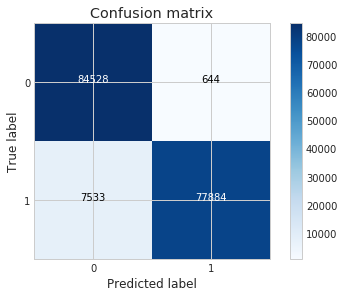

Recall metric in the testing dataset:  0.8993291733495674


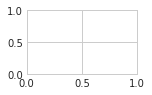

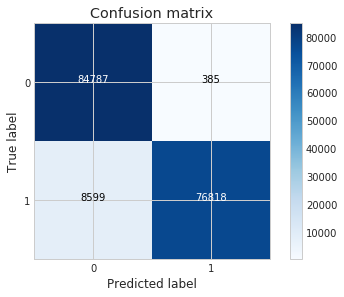

In [53]:
y_pred_proba = grid_search.predict_proba(X_test)  # predict_prob
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  # set different threshold

plt.figure(figsize=(15,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] > i # wether the predicted prob is greater than threshold

    plt.subplot(3,3,j)
    j += 1

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Confusion matrix')
    plt.show()

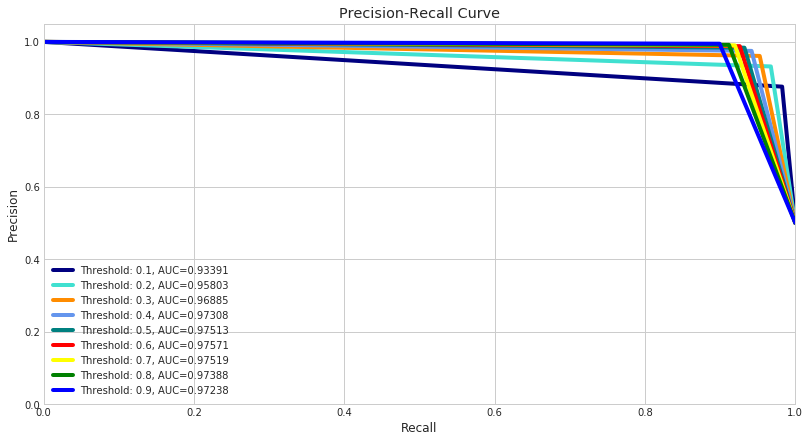

In [54]:
from itertools import cycle
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(12,7))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_proba[:,1] > i # wether the predicted prob is greater than threshold

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predictions_prob)
    area = auc(recall, precision)

    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s, AUC=%0.5f' %(i , area))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

From the above confusion matrix and PRC curve, we realize that the smaller the threshold values, the higher the recall rate, which means the model can predict more fraud transactions, but the tradeoff is that the false positive rate is also higher.